# Sobreamostragem - Smote

In [1]:
import pandas as pd
import random
import numpy as np

dataset = pd.read_csv("..\\DATABASES\\credit_data.csv")
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [2]:
dataset.dropna(inplace=True)

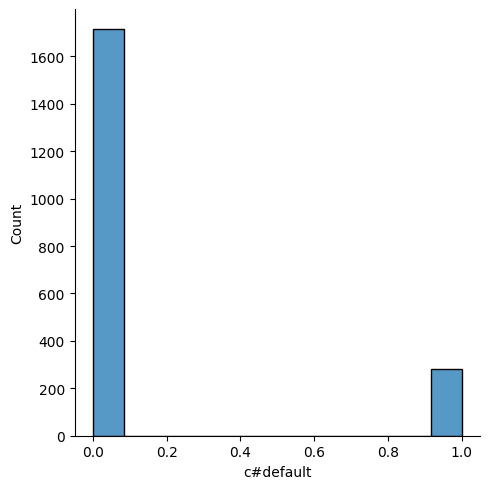

In [3]:
import seaborn as sns
sns.displot(dataset["c#default"])

In [4]:
X = dataset.iloc[:, 1:4].values
X.shape

(1997, 3)

In [5]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [6]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
modelo = GaussianNB()

modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [9]:
previsoes = modelo.predict(X_teste)


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.93

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(previsoes, y_teste)

<AxesSubplot: >

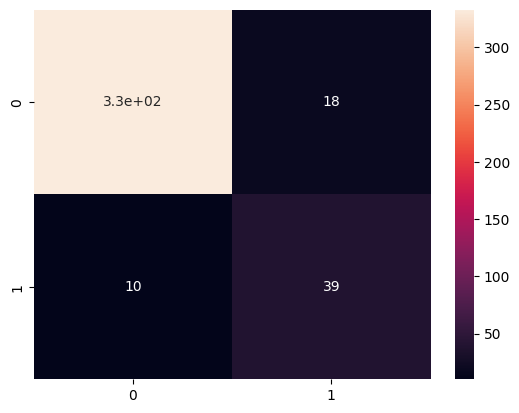

In [12]:
sns.heatmap(cm, annot=True)

In [13]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE(sampling_strategy='not majority')
X_over, y_over = smote.fit_resample(X, y)



In [16]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [18]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [20]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [21]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [22]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [24]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9212827988338192

In [25]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[304,  15],
       [ 39, 328]], dtype=int64)